In [63]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, Embedding, LSTM

In [2]:
with open("train_qa220120145526-220818-175522.txt", "rb") as f:
    train_data = pickle.load(f)

In [3]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [4]:
with open("test_qa220120145430-220818-175426.txt", "rb") as f:
    test_data = pickle.load(f)

In [5]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [6]:
print(type(test_data), type(train_data))

<class 'list'> <class 'list'>


In [7]:
print("Length of Training Data: ", len(train_data))
print("Length of Testing Data: ", len(test_data))

Length of Training Data:  10000
Length of Testing Data:  1000


In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
" ".join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
#Setting up vocabulary
vocab = set()
all_data = test_data + train_data

In [11]:
type(all_data)

list

In [12]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [13]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [14]:
vocab.add('yes')
vocab.add('no')

In [15]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [16]:
len(vocab)

37

In [17]:
vocab_len = len(vocab) + 1

In [22]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [23]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

## Vectorize

In [27]:
tokenizer = Tokenizer(filters = [])

In [28]:
tokenizer.fit_on_texts(vocab)

In [29]:
tokenizer.word_index

{'?': 1,
 'moved': 2,
 'milk': 3,
 'john': 4,
 'is': 5,
 'put': 6,
 '.': 7,
 'discarded': 8,
 'travelled': 9,
 'went': 10,
 'down': 11,
 'dropped': 12,
 'kitchen': 13,
 'left': 14,
 'football': 15,
 'yes': 16,
 'no': 17,
 'garden': 18,
 'grabbed': 19,
 'picked': 20,
 'in': 21,
 'there': 22,
 'bedroom': 23,
 'office': 24,
 'hallway': 25,
 'journeyed': 26,
 'the': 27,
 'got': 28,
 'daniel': 29,
 'bathroom': 30,
 'back': 31,
 'mary': 32,
 'sandra': 33,
 'up': 34,
 'apple': 35,
 'took': 36,
 'to': 37}

In [30]:
train_story_text = []
train_question_text = []
train_answer_text = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [31]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [32]:
len(train_story_seq)

10000

In [34]:
def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    X = [] #Stories
    Xq = [] #Questions
    Y = [] #Answers

    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return (pad_sequences(X, maxlen = max_story_len), pad_sequences(Xq, maxlen = max_question_len), np.array(Y))

In [35]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [36]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [37]:
inputs_train

array([[ 0,  0,  0, ..., 27, 23,  7],
       [ 0,  0,  0, ..., 27, 25,  7],
       [ 0,  0,  0, ..., 27, 30,  7],
       ...,
       [ 0,  0,  0, ..., 27, 23,  7],
       [ 0,  0,  0, ...,  3, 22,  7],
       [ 0,  0,  0, ..., 35, 22,  7]])

In [38]:
queries_train

array([[ 5, 33, 21, 27, 25,  1],
       [ 5, 29, 21, 27, 30,  1],
       [ 5, 29, 21, 27, 24,  1],
       ...,
       [ 5, 33, 21, 27, 25,  1],
       [ 5, 32, 21, 27, 13,  1],
       [ 5, 32, 21, 27, 23,  1]])

In [39]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [47]:
# Input Encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [48]:
# Input Encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

In [49]:
# Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [50]:
#Encode the sequences
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)

question_encoded = question_encoder(question)

In [51]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [52]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [53]:
# Concatenate
answer = concatenate([response, question_encoded])

In [54]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [57]:
answer = LSTM(32)(answer)

In [58]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [59]:
answer = Activation('softmax')(answer)

In [60]:
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [67]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=120, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6952 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6947 - accuracy: 0.4976 - val_loss: 0.6937 - val_accuracy: 0.5030
Epoch 3/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6956 - accuracy: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 3s 11ms/step - loss: 0.6942 - accuracy: 0.5055 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 6s 18ms/step - loss: 0.6948 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 6s 21ms/step - loss: 0.6951 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 7/120
313/313 [==============================] - 7s 22ms/step - loss: 0.6948 - accuracy: 0.5015 - val_loss: 0.6971 - val_accuracy: 0.

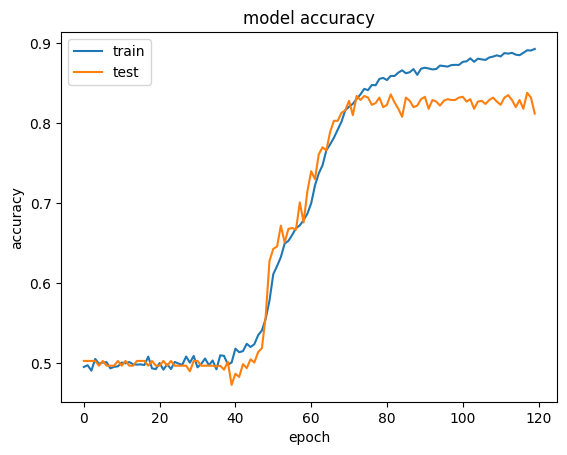

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
# Save the model
model.save('chatbot.h5')

d:\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
model.load_weights("chatbot.h5")
pred_results = model.predict((inputs_test, queries_test))

32/32 [==============================] - 1s 3ms/step


In [72]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [75]:
story = " ".join(test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [76]:
query = " ".join(test_data[0][1])
print(query)

Is John in the kitchen ?


In [77]:
test_data[0][2]

'no'

In [81]:
val_max = np.argmax(pred_results[23])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is:", k)
print("Probablity of certain answer is:", pred_results[23][val_max])

Predicted answer is: no
Probablity of certain answer is: 0.99997425


In [82]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [97]:
story = "Mary dropped football . Sandra discarded apple in kitchen"
story.split()

['Mary',
 'dropped',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [104]:
my_question = "Is Sandra in the kitchen ?"
my_question.split()

['Is', 'Sandra', 'in', 'the', 'kitchen', '?']

In [105]:
my_data = [(story.split(), my_question.split(), 'yes')]

In [106]:
my_story, my_question, my_answer = vectorize_stories(my_data)

In [107]:
pred_results = model.predict(([my_story, my_question]))

1/1 [==============================] - 0s 23ms/step


In [108]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is:", k)
print("Probablity of certain answer is:", pred_results[0][val_max])

Predicted answer is: no
Probablity of certain answer is: 0.9996339
